# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.


**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомимся с исходными данными поближе:

In [16]:
data = pd.read_csv(
    "./data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


Также посмотрим, за какой промежуток времени произведены транзакции.

In [17]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [18]:
display(data.isnull().mean() * 100)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

В данных содержатся пропуски, в признаках CustomerID и Description.  

Посмотрим на статистические характеристики признаков:

In [19]:
data['InvoiceNo'].describe()

count     541909
unique     25900
top       573585
freq        1114
Name: InvoiceNo, dtype: object

Все 540 000 транзакций принадлежат 26 000 разным клиентам

In [20]:
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


Есть транзакции с отрицательным числом товаров - возвраты. В среднем в транзакцию входит 9 товаров, но стоит учитывать, что сюда входят также возвраты. Также, 3/4 транзакций совершены на 4 или менее фунтов стерлингов.


In [21]:
data['Country'].describe()

count             541909
unique                38
top       United Kingdom
freq              495478
Name: Country, dtype: object

Есть клиенты из 38 стран мира, но самая распространенная страна в транзакциях - Англия.

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалим их из данных.


In [22]:
print('строк до обработки пропусков: {}'.format(data.shape[0]))
# посмотрим, сколько пропусков в процентном соотношении
display(data.isnull().mean() * 100)
print('найдено строк с пропусками: {}'.format(data[data['CustomerID'].isnull()].shape[0]))
# удаляем строки с пропущенными значениями
data.dropna(axis=0, how='any', inplace=True)
# проверяем
print('строк после обработки пропусков: {}'.format(data.shape[0]))
display(data.isnull().mean() * 100)

строк до обработки пропусков: 541909


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

найдено строк с пропусками: 135080
строк после обработки пропусков: 406829


InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

#### 2.1.2. Дубликаты

Проверим данные на наличие дубликатов. Удалим их из данных.


In [23]:
print(f'число найденных дубликатов: {data[data.duplicated()].shape[0]}')
data.drop_duplicates(inplace=True)
print('строк всего после обработки: {}'.format(data.shape[0]))

число найденных дубликатов: 5225
строк всего после обработки: 401604


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [24]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создадим в данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

In [25]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии \
        товара для каждой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнаем, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалим их из данных.

Когда разберёмся с возвратами, удалим транзакции с отрицательным количеством товара — они нам больше не нужны.

In [26]:
print('транзакций, не имеющих контрагентов: {}'.format(data['QuantityCanceled'].isna().sum()))
# удаляем эти транзакции
data.dropna(axis=0, how='any', inplace=True)

print('транзакций-возвратов: {}'.format(data[data['Quantity'] < 0].shape[0]))
# удаляем эти транзакции 
data = data[~(data['Quantity'] < 0)]

print('всего транзакций после манипуляций: {}'.format(data.shape[0]))

транзакций, не имеющих контрагентов: 1303
транзакций-возвратов: 7569
всего транзакций после манипуляций: 392732


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдём такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалим все специальные транзакции из таблицы.

In [27]:
import re
# используем функцию для извлечения специального кода
def find_code(row):
    letters = re.findall(r'[A-Za-z]', row)
    return ''.join(letters)

data['Special_code'] = data['StockCode'].apply(find_code)

print('всего специальных транзакций: {}'.format(data[~(data['Special_code']=='')]['Special_code'].count()))
# отбросим все специальные транзакции 
data = data[data['Special_code']=='']
# теперь этот признак не нужен, удалим его
data.drop(['Special_code'], axis=1, inplace=True)
print('всего простых транзакций: {}'.format(data.shape[0]))

всего специальных транзакций: 34423
всего простых транзакций: 358309


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [28]:
print('транзакций без стоимости: {}'.format(data[data['UnitPrice']==0]['UnitPrice'].count()))
# отбросим эти транзакции
data = data[~(data['UnitPrice']==0)]
print('всего транзакций: {}'.format(data.shape[0]))

транзакций без стоимости: 32
всего транзакций: 358277


#### 2.1.6. Общая стоимость товаров в транзакции

Добавим в датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет нам рассчитать покупательскую способность каждого из клиентов.

In [29]:
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])
data.to_csv('data/data_clean.csv', index=False)

### 2.2. Разведывательный анализ

После предобработки исходных данных произведём разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируем данные по датам и часам совершения транзакции и найдём количество заказов на каждый день-час. 

In [30]:
data = pd.read_csv('data/data_clean.csv', sep=',')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

1. Клиенты из каких стран покупают больше и чаще?

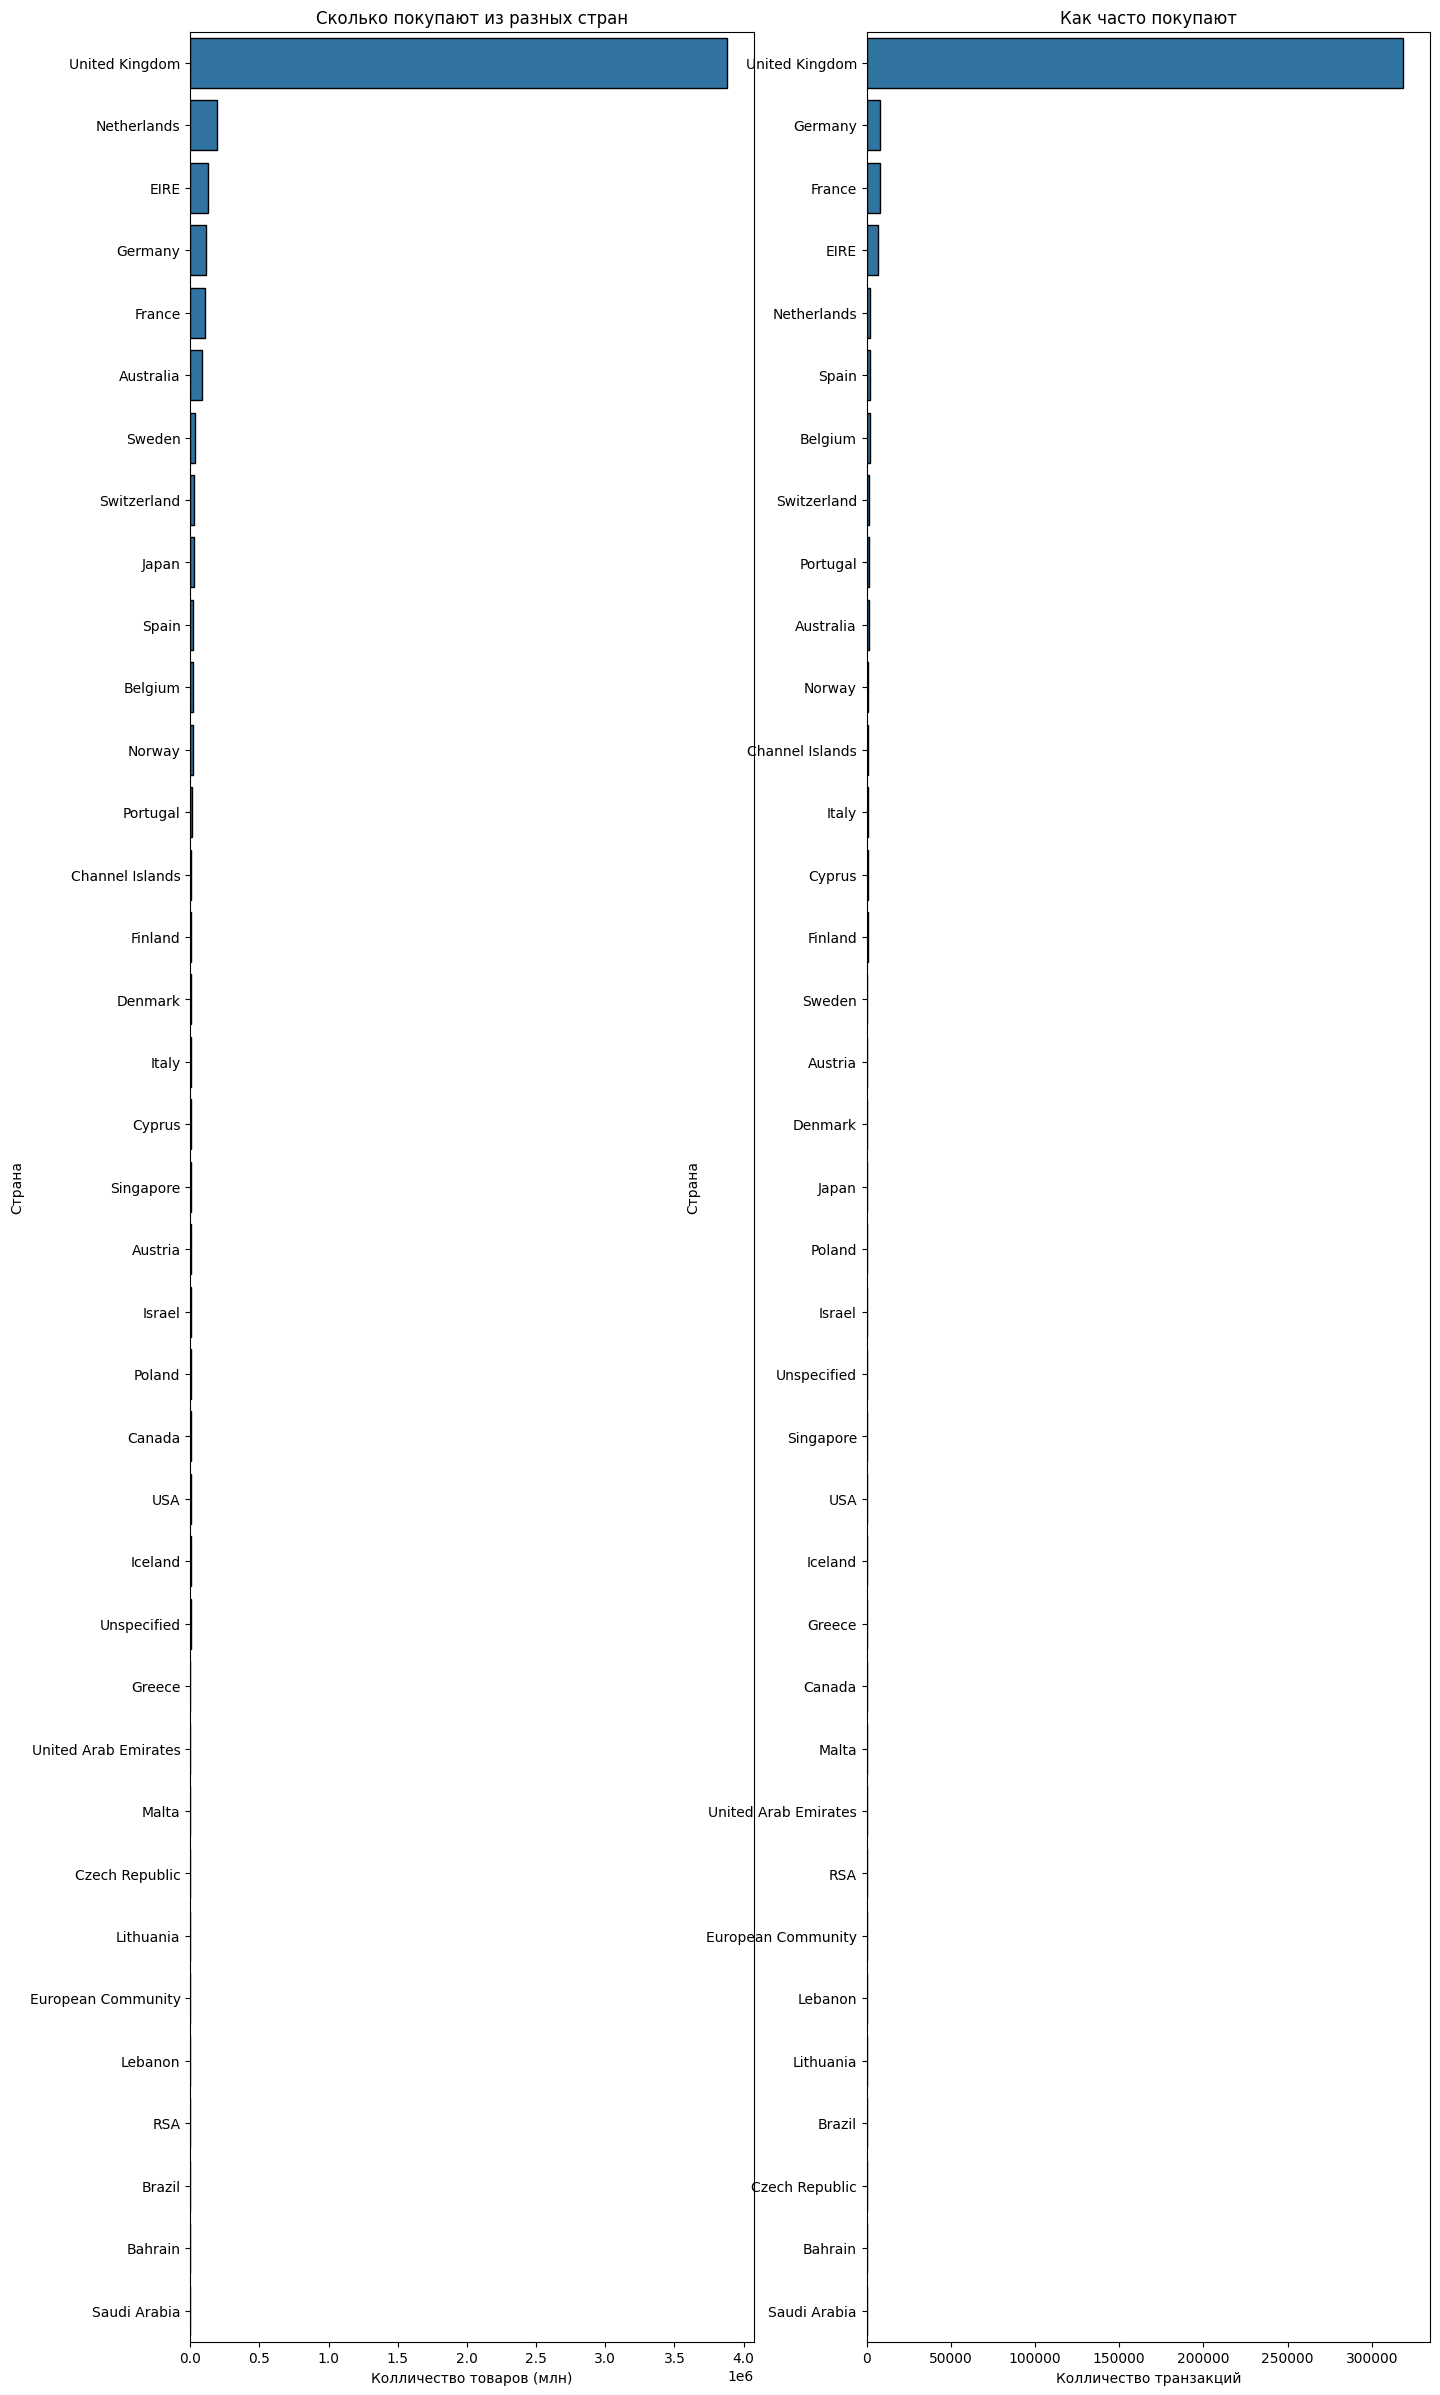

In [31]:
# сколько много покупают клиенты из разных стран
group_sum = data.groupby(by='Country')['Quantity'].sum().sort_values(ascending=False).reset_index()
# как часто покупают клиенты из разных стран
group_count = data.groupby(by='Country')['Quantity'].count().sort_values(ascending=False).reset_index()
# строим графики
fig, axes = plt.subplots(ncols=2, figsize=(16, 30))
sns.barplot(data=group_sum, x='Quantity', y='Country', ax=axes[0])
axes[0].set_title("Сколько покупают из разных стран")
axes[0].set_ylabel("Страна")
axes[0].set_xlabel("Колличество товаров (млн)");
sns.barplot(data=group_count, x='Quantity', y='Country', ax=axes[1])
axes[1].set_title("Как часто покупают")
axes[1].set_ylabel("Страна")
axes[1].set_xlabel("Колличество транзакций");

Безоговорочным лидер по числу и частоте покупок - Объединенное Королевство. Далее в пятёрку по числу и частоте покупок входят Нидерланды, Ирландия, Германия, Франция.

2. Присутствует ли в продажах сезонность (когда покупают чаще)?

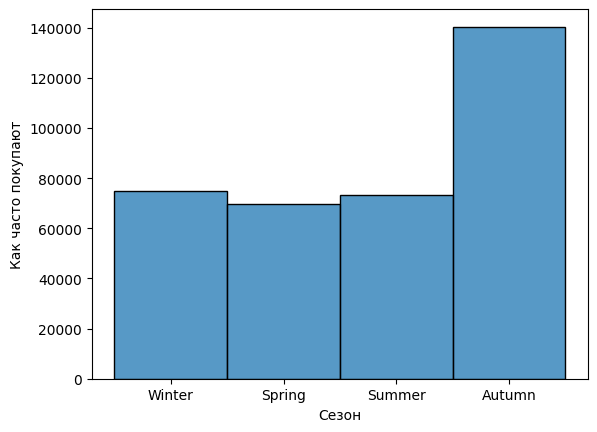

In [32]:
def season_sale(row):
    if row == 1 or row == 2 or row == 12: return 'Winter'
    elif row == 3 or row == 4 or row == 5: return 'Spring'
    elif row == 6 or row == 7 or row == 8: return 'Summer'
    else: return 'Autumn'
# Создадим новый признак, отражающий часть года
data['Season'] = data['InvoiceDate'].dt.month.apply(season_sale)

fig, ax = plt.subplots()
sns.histplot(data=data, x='Season')
ax.set_title('')
ax.set_xlabel('Сезон')
ax.set_ylabel('Как часто покупают');

Осенью закупок становится вдвое больше, чем в любой другой сезон. В остальное время - однородно.


3. Какие страны приносят наибольшую сезонную выручку?

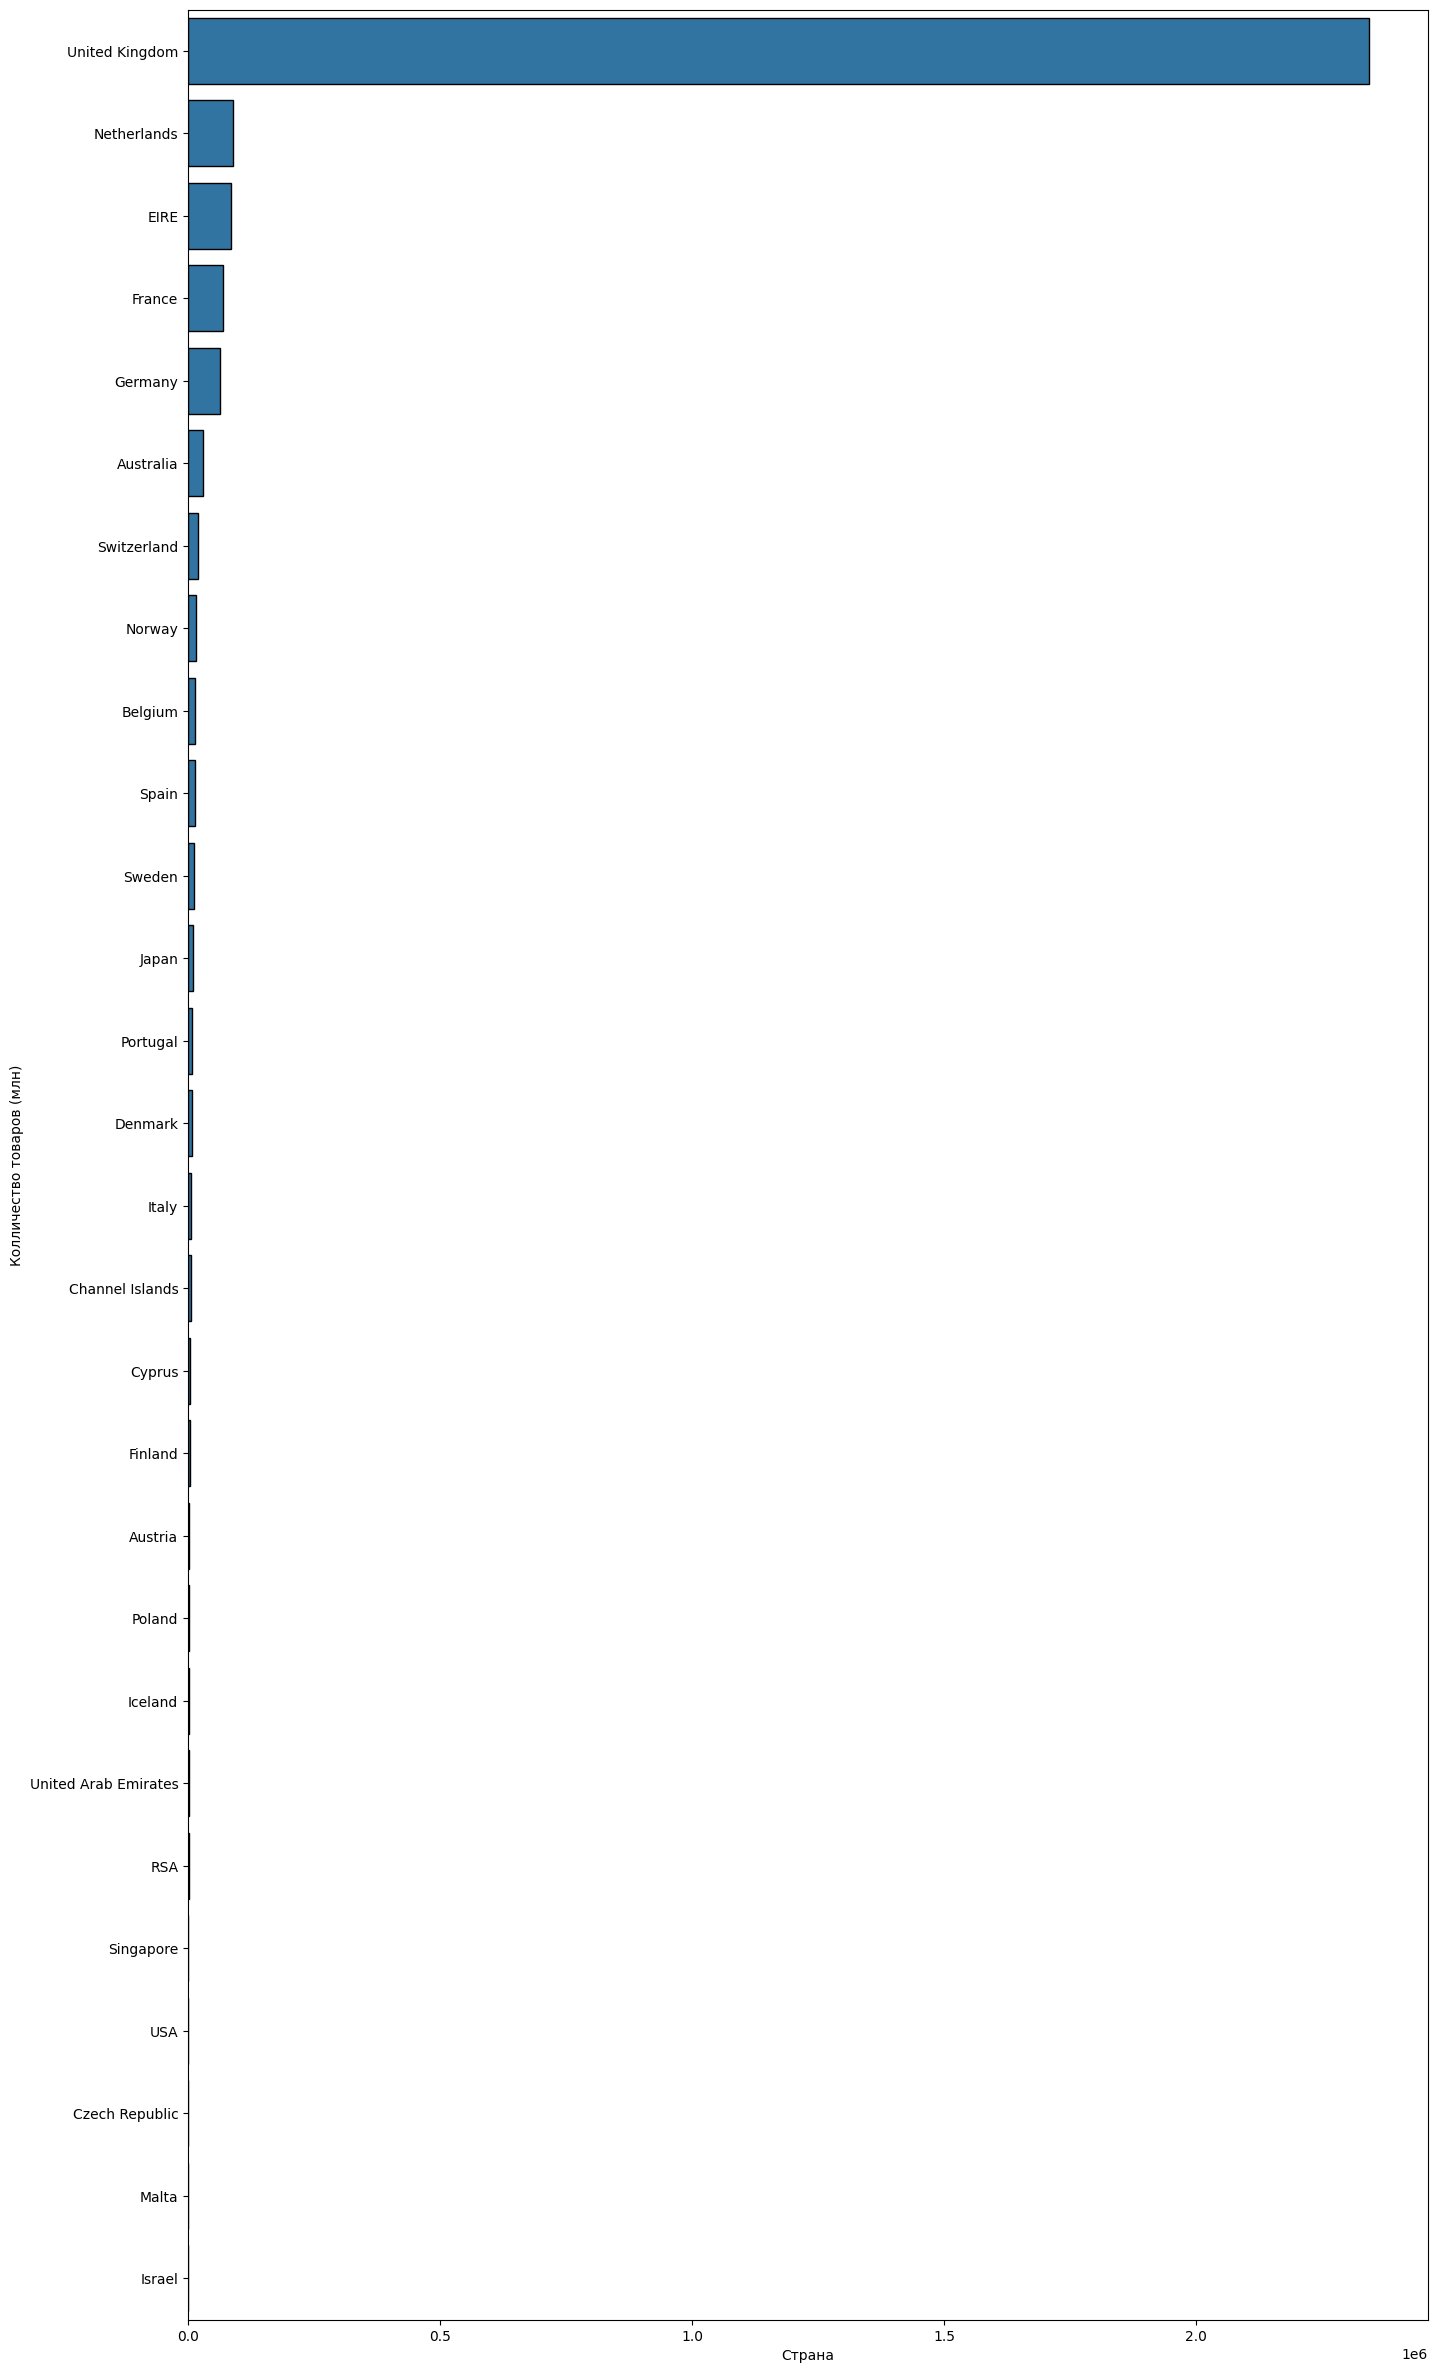

In [33]:
season_group = data[data['Season']=='Autumn'].groupby(by='Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(16, 30))
sns.barplot(data=season_group, x='TotalPrice', y='Country', ax=ax)
ax.set_title("")
ax.set_xlabel("Страна")
ax.set_ylabel("Колличество товаров (млн)");

Полученный график похож на график числа закупок из разных стран, но здесь немного меньше стран. Некоторые страны не делают покупок осенью.

4. Количество заказов на каждый день-час:

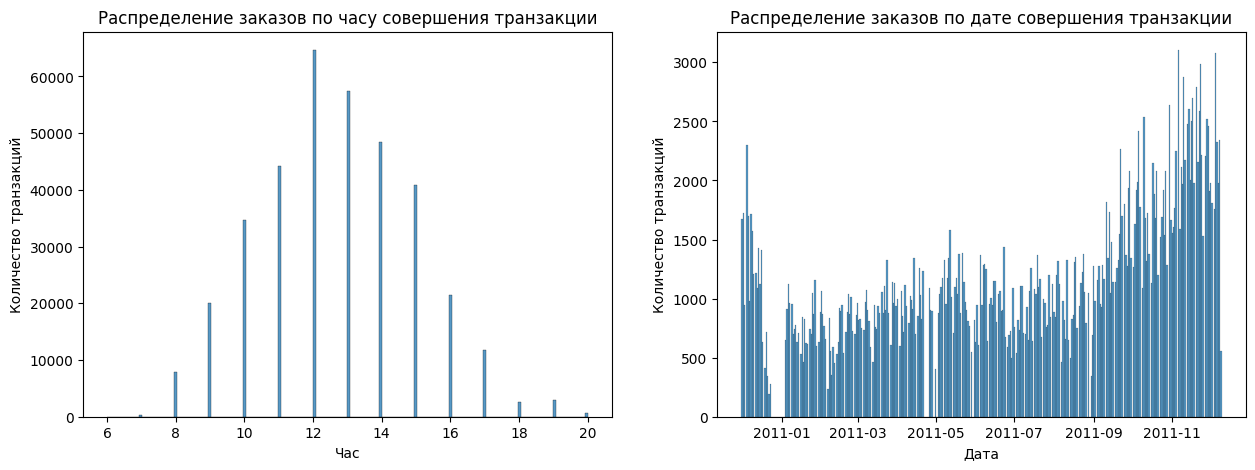

In [34]:
data['date'] = data['InvoiceDate'].dt.date
data['hour'] = data['InvoiceDate'].dt.hour
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(data=data, x='hour', ax=axes[0])
axes[0].set_title("Распределение заказов по часу совершения транзакции")
axes[0].set_xlabel("Час")
axes[0].set_ylabel("Количество транзакций");
sns.histplot(data=data, x='date', ax=axes[1])
axes[1].set_title("Распределение заказов по дате совершения транзакции")
axes[1].set_xlabel("Дата")
axes[1].set_ylabel("Количество транзакций");

Распределение заказов по часу совершения транзакции - нормальное, с пиком в полдень. Распределение заказов по дате совершения транзакции соответствует графику сезонности, можно отметить, что за несколько дней до Нового года заказы не поступают (или не принимаются).

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

In [35]:
# создадим RFM таблицу с Recency
rfm_table = (pd.to_datetime('2011-12-10 00:00:00') -\
    data.groupby('CustomerID')['InvoiceDate'].last()).reset_index()
# рассчитаем Frequency
rfm_table = rfm_table.merge(right=data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
# рассчитаем Monetary
rfm_table = rfm_table.merge(right=data.groupby('CustomerID')['TotalPrice'].sum().reset_index())
# переименуем колонки, чтобы они соответствовали своему смыслу
rfm_table.rename({'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'}, axis=1, inplace=True)
# переведём Recency из  формата datetime в число - колличество дней суммарно
rfm_table['Recency'] = rfm_table['Recency'].dt.days
# сделаем колонку CustomerID индексом
rfm_table.set_index('CustomerID', inplace=True)
rfm_table

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,3653.45
12348,75,4,1437.24
12349,18,1,1372.42
12350,310,1,258.00
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,176.60


Визуализируем каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot).

In [36]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [37]:
# Определяем 95-й процентиль для 'Frequency' и 'Monetary'
frequency_threshold = rfm_table['Frequency'].quantile(0.95)
monetary_threshold = rfm_table['Monetary'].quantile(0.95)
# Удаляем строки, где значения 'Frequency' и 'Monetary' больше, чем у 95% строк
rfm_table = rfm_table[(rfm_table['Frequency'] <= frequency_threshold) & (rfm_table['Monetary'] <= monetary_threshold)]
print(f'строк стало: {rfm_table.shape[0]}')
rfm_table.to_csv('data/rfm_table.csv')

строк стало: 4031


## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, уменьшим размерность исходных признаков до двух компонент.

Произведём предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков. Используем следующие методы:
- Иерархическая кластеризация
- Спектральная кластеризация
- алгоритм K-Means

Подберём оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно.

Выберем алгоритм с наибольшим коэффициентом силуэта.


In [38]:
from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

rfm_table = pd.read_csv('data/rfm_table.csv', sep=',', index_col=0)

pipeline = Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('pca', PCA(n_components=2))
])
X = pipeline.fit_transform(rfm_table)
X = pd.DataFrame(data=X, columns=['x1', 'x2'])
X

,x1,x2
0,-2.131733,1.394960
1,3.221376,0.719303
2,0.698653,0.128139
3,0.170840,-0.709681
4,-1.895210,1.370507
...,...,...
4026,-0.860424,-0.723677
4027,-1.793792,1.051947
4028,-1.412724,0.168005
4029,-0.306051,-1.190862


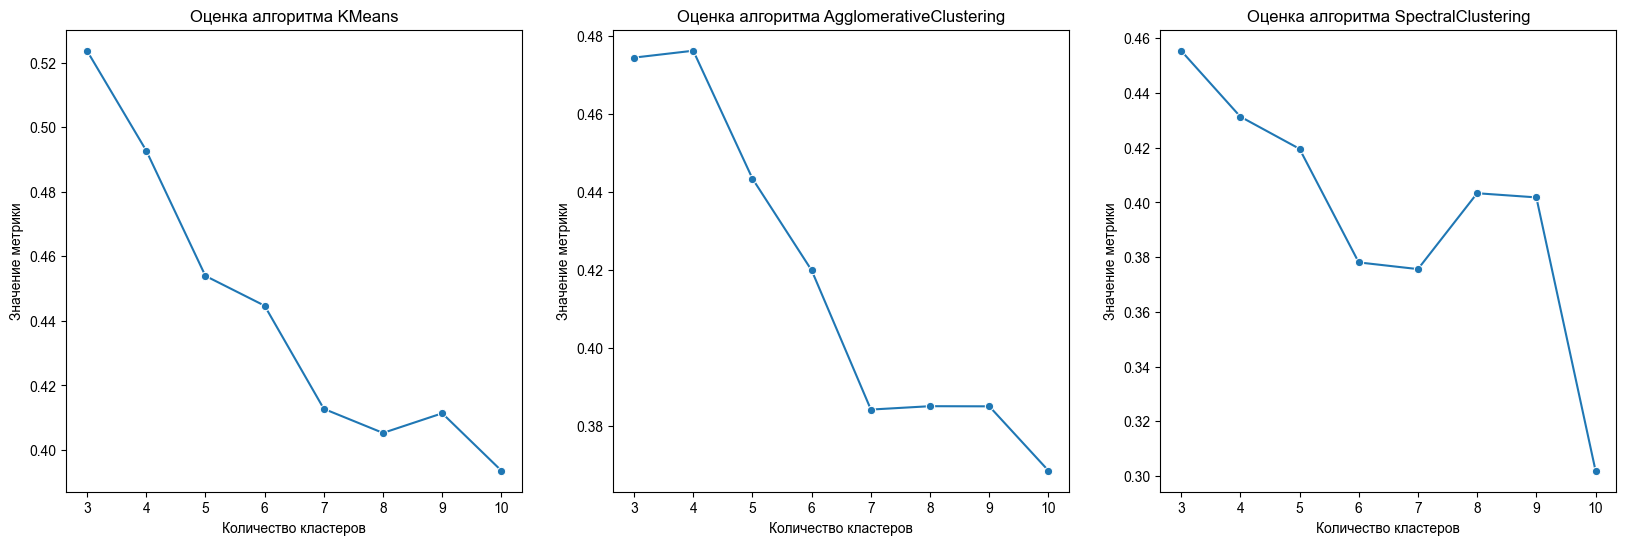

In [39]:
# используем функцию для поиска метрики
def get_silhouette(cluster_num, X):
    # реализуем алгоритм KMeans
    k_means = cluster.KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    k_means_silhouette = metrics.silhouette_score(X, k_means.labels_)
    # реализуем алгоритм AgglomerativeClustering
    agglo_clust = cluster.AgglomerativeClustering(n_clusters=cluster_num)
    agglo_clust.fit(X)
    agglo_clust_silhouette = metrics.silhouette_score(X, agglo_clust.labels_)
    # реализуем алгоритм SpectralClustering
    spectral_clust = cluster.SpectralClustering(n_clusters=cluster_num, random_state=42)
    spectral_clust.fit(X)
    spectral_clust_silhouette = metrics.silhouette_score(X, spectral_clust.labels_)
    # вернём значение метрики для трёх алгоритмов
    return k_means_silhouette, agglo_clust_silhouette, spectral_clust_silhouette

# сюда будем записывать метрики
silhouette_res = {"k_means_silhouette": [], "agglo_clust_silhouette": [],\
    "spectral_clust_silhouette": [], "cluster_num": []}
# пройдёмся циклом для поиска наилучшего значения кластеров
for cluster_num in range(3, 11):
    var1, var2, var3 = get_silhouette(cluster_num, X)
    silhouette_res["k_means_silhouette"].append(var1)
    silhouette_res["agglo_clust_silhouette"].append(var2)
    silhouette_res["spectral_clust_silhouette"].append(var3)
    silhouette_res["cluster_num"].append(cluster_num)
# обернём в dataframe для удобства
silhouette_df = pd.DataFrame(silhouette_res)
# построим графики
fig, axes = plt.subplots(ncols=3, figsize=(20, 6))
sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="cluster_num", y="k_means_silhouette", marker= "o", ax=axes[0])
axes[0].set_title("Оценка алгоритма KMeans")
axes[0].set_xlabel("Количество кластеров")
axes[0].set_ylabel("Значение метрики")
sns.lineplot(data=silhouette_df, x="cluster_num", y="agglo_clust_silhouette", marker= "o", ax=axes[1])
axes[1].set_title("Оценка алгоритма AgglomerativeClustering")
axes[1].set_xlabel("Количество кластеров")
axes[1].set_ylabel("Значение метрики")
sns.lineplot(data=silhouette_df, x="cluster_num", y="spectral_clust_silhouette", marker= "o", ax=axes[2])
axes[2].set_title("Оценка алгоритма SpectralClustering")
axes[2].set_xlabel("Количество кластеров")
axes[2].set_ylabel("Значение метрики");
plt.show()

Наилучший результат показал алгоритм KMeans с 3 кластерами (0.526 значение метрики), затем AgglomerativeClustering с 4 кластерами (0.476), и SpectralClustering с 3 кластерами (0.455)

Сделаем предсказание меток кластеров с алгоритмом KMeans:

In [40]:
k_means = cluster.KMeans(n_clusters=3, random_state=42)
k_means.fit(X)
label_pred = k_means.labels_

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируем результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируем полученную диаграмму и попробуем понять, какие кластеры у нас получились.

In [41]:
# вернёмся к RFM-таблице
rfm_table['cluster'] = label_pred
# построим 3d-график
fig = px.scatter_3d(
    data_frame=rfm_table,
    x = 'Recency',
    y = 'Frequency',
    z = 'Monetary',
    color='cluster',
    width=1000,
    height=700
)
fig.show()

В итоге получили следующие кластеры:
- cluster 2:
    - Recency от 150 до 350
    - Frequency от 0 до 6
    - Monetary от 0 до 2000
- cluster 0:
    - Recency от 0 до 150
    - Frequency от 0 до 7
    - Monetary от 0 до 2500
- cluster 1:
    - Recency от 0 до 200
    - Frequency от 0 до 13
    - Monetary от 0 до 5000
    
cluster 1 условно можно назвать лояльными клиентами: они совершают много покупок, у большинства клиентов из этого кластера параметр Recency не превышает 100, что говорит о большой частоте покупок.

cluster 0 - перспективные. Эти клиенты покупают меньше, чем клиенты из кластера 1, но давность последней покупки для этих клиентов немного ниже, чем у лояльных. При этом клиенты из этого кластера тратят на покупки большие деньги. Эти клиенты могут перейти в категорию лояльных.

cluster 2. Эти клиенты тратят меньше и реже, чем предыдущие. Большой перерыв между последней покупкой, это либо сезонные клиенты, либо в зоне потери.

#### 3.2.2. Построение профиля кластеров

Далее составим так называемый профиль кластеров. Для этого нам необходимо вернуться от декомпозированных данных  к RFM-таблице (очищенной от выбросов).

Сгруппируем RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).


In [42]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()
    
# Большинство алгоритмов выбрало оптимальным значением для кластеризации 3 кластера, используем это значение    
plot_cluster_profile(rfm_table.drop('cluster', axis=1), 3)

Полученная диаграмма в целом соответствует выводам, полученным в 3.2.1:
- cluster 0 - исчезающе малые частота и денежная ценность, это клиенты в зоне потери;
- cluster 1 - клиенты из этого кластера покупают часто и на большие суммы, это лояльные клиенты;
- cluster 2 - этот кластер равномерно распределён по всем осям. Это потенциальные клиенты, они могут перейти в категорию лояльных, или уйти.

## 4. Выводы

В ходе анализа транзакций клиентов было выявлено 3 кластера, к которым относятся клиенты: лояльные, потенциальные и в зоне потери. 

Также были выявлены следующие факты:
- большинство всех покупок совершают клиенты из Англии, в топ 5 по частоте и по суммам транзакций входят страны Европы, но в целом есть клиенты со всех частей света;
- Наблюдается сезонность по частоте покупок - осенью клиенты совершают покупки в 2 раза больше, чем в любой другой сезон.